# Tests

## Example 1: Simple

In [1]:
from flowstar.reachability import Reach
from flowstar.poly import Poly
from ulbc import *
from sage.all import *

In [2]:
R, (x,y) = PolynomialRing(RIF, 'x, y').objgens()

In [3]:
odes = [
    -y,
    x,
]
initials = [(4,5), (1,2)]
reach = Reach(odes, [(4,5), (1,2)], 2*pi, 0.1, order=10)

In [4]:
def plot_signal(sig):
    return sig.to_domain(RIF(0,2*pi)).plot().show(
        ticks=[pi/2, 1], tick_formatter=pi, aspect_ratio=2/3)

In [5]:
reach.res

2

In [6]:
reach(RIF(1,2))[0].str(style='brackets')

'[-3.9498690968545423 .. 1.9455015887879262]'

/usr/lib64/python2.7/site-packages/numpy/core/getlimits.py:411: UserWarning: Signature �������� for <type 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


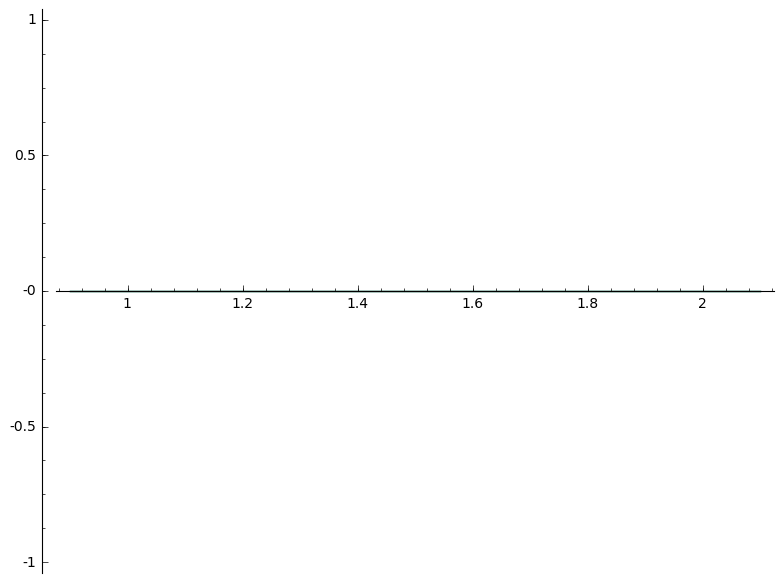

In [7]:
reach.sage_plot(x, (0.9,2.1))

In [12]:
reach(RIF(1,2))[1].str(style='brackets')

'[2.7656753616904756 .. 5.5009063678660049]'

In [13]:
reach.sage_plot(y, (1,2))

Graphics object consisting of 2 graphics primitives

In [ ]:
P = Atomic(x - 3); P

In [ ]:
P.signal(reach, odes).plot() + P.sage_plot(reach)

In [ ]:
plot_signal( P.signal_for_system(odes, initials, 2*pi) )

In [ ]:
Q = Atomic(3 - y); Q

In [ ]:
Q.signal(reach, odes).plot() + Q.sage_plot(reach)

In [ ]:
plot_signal( Q.signal_for_system(odes, initials, 2*pi) )

In [ ]:
plot_signal( G(RIF(1,1.2), P).signal_for_system(odes, initials, 2*pi) )

In [ ]:
plot_signal( F(RIF(3.5, 4), Q).signal_for_system(odes, initials, 2*pi) )

In [ ]:
plot_signal( (G(RIF(1,1.2), P) | F(RIF(3.5,4), Q)).signal_for_system(odes, initials, 2*pi) )

In [ ]:
(G(RIF(1,1.2), P) & F(RIF(3.5,4), Q)).signal_for_system(odes, initials, 2*pi).plot()

In [ ]:
sig = U(G(RIF(1, 1.2), P), RIF(0.4, 0.5), F(RIF(3.5, 4), Q)).signal_for_system(
    odes, [RIF(4, 5), RIF(1, 2)], 2*pi)
plot_signal( sig )

## Context!

In [ ]:
{y: RIF(9,10)} >> P

In [ ]:
sig = ({y: RIF(9,10)} >> P).signal_for_system(odes, initials, 4*pi)

In [ ]:
sig.plot()

In [ ]:
sig = ({y: RIF(9,10)} >> G(RIF(0, 5), P)).signal_for_system(odes, initials, 4*pi)

In [ ]:
sig.plot()

In [ ]:
sig = ({y: RIF(9,10)} >> G(RIF(0, pi/2), Atomic(y))).signal_for_system(odes, initials, 4*pi)

In [ ]:
sig.plot()

## Differential context!

In [ ]:
sig = ({y: RIF(9,10)} % P).signal_for_system(odes, initials, 4*pi)

In [ ]:
sig = ({y: RIF(0.5,0.6)} % P).signal_for_system(odes, initials, 4*pi, verbosity=10)

In [ ]:
({y: RIF(9,10)} % P)

In [ ]:
sig.plot()

In [ ]:
sig = ({y: RIF(0.5, 0.6)} % G(RIF(0, 5), P)
       ).signal_for_system(odes, initials, 4*pi, verbosity=10)

In [ ]:
sig.plot()